<a href="https://colab.research.google.com/github/AnnaMalmgren/deep_learning_birdsong_classification/blob/main/final_project_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore Data 

### Anna Malmgren 

This is a colab file for the final project in the course Deep Learning - metoder och tillämpningar, held by Umeå University.  

**Other colab files for the project:**  
[Feature extraction](https://colab.research.google.com/drive/1BWXWWo-2qeFOg6EQBF3Rf_CKa69Ed1s5?usp=sharing)  
[Training and Evaluation](https://colab.research.google.com/drive/14B5j_LmViakBlDBIoNYqXEJjro5UPPnl?usp=sharing
)


## Import dependencies and Download data  

dataset from: [birdsongs from europe](https://www.kaggle.com/datasets/monogenea/birdsongs-from-europe)


In [ ]:
# install kaggle

!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import kaggle.json to be able to download data from kaggle 

from google.colab import files

# upload the kaggle.json file
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [ ]:
# import dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import os
import librosa
import librosa.display
import glob
from itertools import cycle
from pathlib import Path
import IPython.display as ipd

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Download and unzip the birsongs-from-europe kaggle dataset

!kaggle datasets download -d monogenea/birdsongs-from-europe --unzip


100% 7.46G/7.46G [03:09<00:00, 66.4MB/s]
100% 7.46G/7.46G [03:09<00:00, 42.2MB/s]


## Basic statistics

Explore the dataset by printing some statistics using Pandas. 

In [ ]:
df = pd.read_csv('/content/metadata.csv')

df.head()

,Recording_ID,Genus,Specific_epithet,Subspecies,English_name,Recordist,Country,Locality,Latitude,Longitude,...,Other_species23,Other_species24,Other_species25,Other_species26,Other_species27,Other_species28,Other_species29,Other_species30,Species,Path
0,356824,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"doñana visitable, sevilla, andalucía",37.1058,-6.2577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-356824.mp3
1,317951,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"arroyo algarbe, hinojos, huelva, andalucía",37.3006,-6.3783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-317951.mp3
2,508571,Sonus,naturalis,NaN,Soundscape,Nelson Conceição,Portugal,"Santo Estêvão, Tavira, Faro",37.1554,-7.6960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-508571.mp3
3,448534,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"Córdoba, Córdoba, Andalucía",37.9321,-4.9446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-448534.mp3
4,373414,Sonus,naturalis,NaN,Soundscape,Lars Lachmann,Germany,"Frohnau, Berlin, north-eastern part",52.6408,13.2956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-373414.mp3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recording_ID       2150 non-null   int64  
 1   Genus              2150 non-null   object 
 2   Specific_epithet   2150 non-null   object 
 3   Subspecies         249 non-null    object 
 4   English_name       2150 non-null   object 
 5   Recordist          2150 non-null   object 
 6   Country            2150 non-null   object 
 7   Locality           2149 non-null   object 
 8   Latitude           2106 non-null   float64
 9   Longitude          2106 non-null   float64
 10  Vocalization_type  2150 non-null   object 
 11  Audio_file         2150 non-null   object 
 12  License            2150 non-null   object 
 13  Url                2150 non-null   object 
 14  Quality            2150 non-null   object 
 15  Time               2150 non-null   object 
 16  Date               2150 

In [ ]:
df.describe(include=object)

,Genus,Specific_epithet,Subspecies,English_name,Recordist,Country,Locality,Vocalization_type,Audio_file,License,...,Other_species15,Other_species16,Other_species17,Other_species18,Other_species19,Other_species20,Other_species21,Other_species22,Species,Path
count,2150,2150,249,2150,2150,2150,2149,2150,2150,2150,...,22,20,18,14,9,6,5,1,2150,2150
unique,34,50,66,50,266,33,902,118,2150,6,...,17,14,14,9,7,4,3,1,50,2150
top,Emberiza,naturalis,cyanecula,Soundscape,david m,Poland,"Ryedale District (near Helperthorpe), North Y...","male, song",//www.xeno-canto.org/356824/download,//creativecommons.org/licenses/by-nc-sa/4.0/,...,Serinus serinus,Chloris chloris,Carduelis carduelis,Galerida cristata,Melanocorypha calandra,Passer hispaniolensis,Corvus corax,Motacilla alba,Sonus naturalis,mp3//Sonus-naturalis-356824.mp3
freq,215,43,16,43,439,454,255,1568,1,1186,...,3,3,3,3,3,3,3,1,43,1


In [ ]:
# print number of species in the dataset, as well as the distribution

from pandas.core.algorithms import unique
num_species = len(df['Species'].unique())
print(f'There are {num_species} unique bird species in the dataset \n')

print(df['Species'].value_counts())


There are 50 unique bird species in the dataset 

Sonus naturalis               43
Carpodacus erythrinus         43
Phoenicurus phoenicurus       43
Aegolius funereus             43
Cyanistes caeruleus           43
Hirundo rustica               43
Emberiza cirlus               43
Locustella naevia             43
Cuculus canorus               43
Sylvia curruca                43
Loxia curvirostra             43
Emberiza hortulana            43
Athene noctua                 43
Fringilla coelebs             43
Crex crex                     43
Acrocephalus schoenobaenus    43
Acrocephalus palustris        43
Periparus ater                43
Phylloscopus sibilatrix       43
Emberiza schoeniclus          43
Hippolais icterina            43
Pyrrhula pyrrhula             43
Caprimulgus europaeus         43
Ficedula hypoleuca            43
Luscinia luscinia             43
Alauda arvensis               43
Luscinia svecica              43
Linaria cannabina             43
Parus major               

## Basic visualization

Explore the dataset by plotting some basic statistics using pandas, seaborn, and matplotlib.

Code inspired by: [Birdcall Recognition: EDA and Audio FE](https://www.kaggle.com/code/andradaolteanu/birdcall-recognition-eda-and-audio-fe)




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

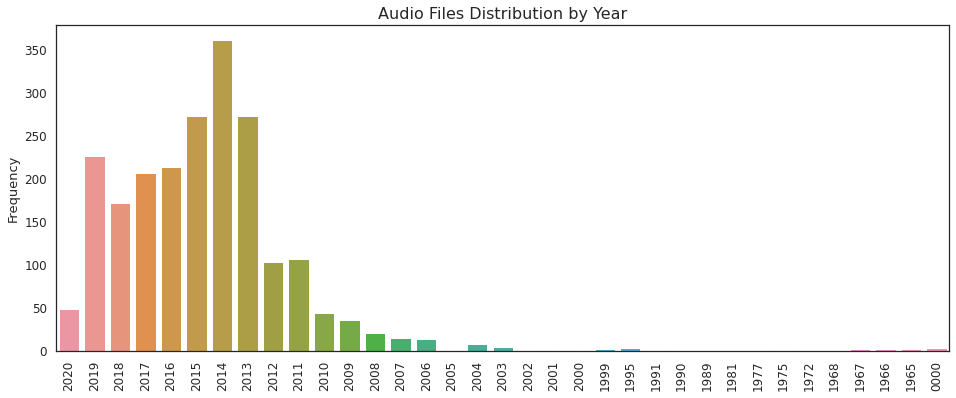

In [ ]:
# Plot distribution by year

df['year'] = df['Date'].apply(lambda x: x.split('-')[0])

sorted_by_year = df.sort_values(by='year', ascending=False)

plt.figure(figsize=(16, 6))
ax = sns.countplot(sorted_by_year['year'])

plt.title("Audio Files Distribution by Year", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Frequency", fontsize=13)
plt.xlabel("");

# Uncomment rows below if you want to download the plot
# plt.savefig("distribution_by_year.png")
# files.download("distribution_by_year.png")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

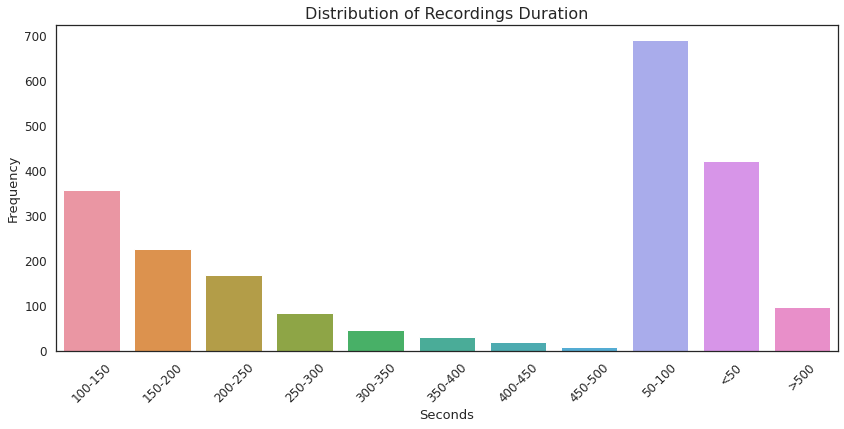

In [ ]:
# Calculate and plut distribution by duration (in seconds)

df['duration'] = df['Length'].apply(lambda x: x.split(':'))
df['duration'] =  df['duration'].apply(lambda x: int(x[0]) * 60 + int(x[1]))


df['duration_interval'] = "<50"
df.loc[(df['duration'] > 50) & (df['duration'] <= 100), 'duration_interval'] = "50-100"
df.loc[(df['duration'] > 100) & (df['duration'] <= 150), 'duration_interval'] = "100-150"
df.loc[(df['duration'] > 150) & (df['duration'] <= 200), 'duration_interval'] = "150-200"
df.loc[(df['duration'] > 200) & (df['duration'] <= 250), 'duration_interval'] = "200-250"
df.loc[(df['duration'] > 250) & (df['duration'] <= 300), 'duration_interval'] = "250-300"
df.loc[(df['duration'] > 300) & (df['duration'] <= 350), 'duration_interval'] = "300-350"
df.loc[(df['duration'] > 350) & (df['duration'] <= 400), 'duration_interval'] = "350-400"
df.loc[(df['duration'] > 400) & (df['duration'] <= 450), 'duration_interval'] = "400-450"
df.loc[(df['duration'] > 450) & (df['duration'] <= 500), 'duration_interval'] = "450-500"
df.loc[(df['duration'] > 500), 'duration_interval'] = ">500"

durations = df.sort_values(by='duration_interval')
plt.figure(figsize=(14, 6))
ax = sns.countplot(durations['duration_interval'])

plt.title("Distribution of Recordings Duration", fontsize=16)
plt.ylabel("Frequency", fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel("Seconds", fontsize=13);

# Uncomment rows below if you want to download the plot
# plt.savefig("distribution_by_duration.png")
# files.download("distribution_by_duration.png")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

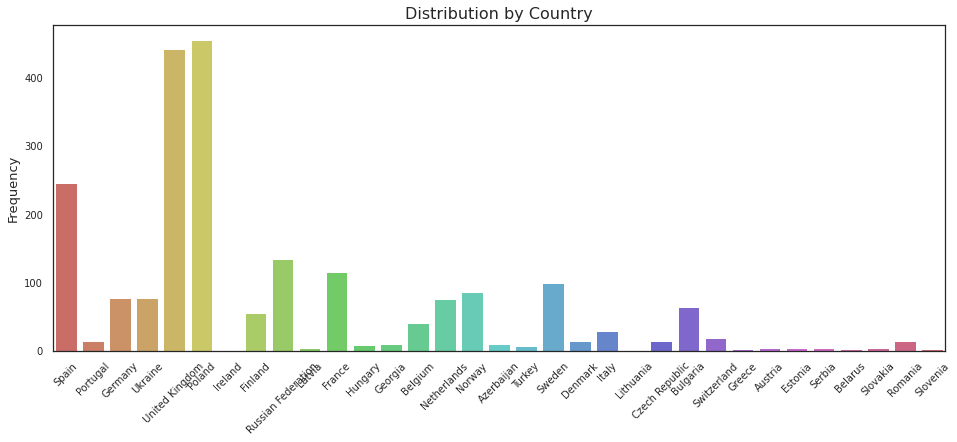

In [ ]:
# Plot distribution by country 

plt.figure(figsize=(16, 6))
ax = sns.countplot(df['Country'], palette="hls")

plt.title("Distribution by Country", fontsize=16)
plt.ylabel("Frequency", fontsize=13)
plt.yticks(fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.xlabel("");

# Uncomment rows below if you want to download the plot
# plt.savefig("distribution_by_country.png")
# files.download("distribution_by_country.png")

## Audio Files

Convert audio files to wav files, and explore the audio signals. 

Code from: [working-with-audio-in-python](https://www.kaggle.com/code/robikscube/working-with-audio-in-python/notebook)

In [ ]:
# Change from mp3 to wav

cwd = '/content/mp3'
suffix_wav = 'wav'

for dir, _, files in os.walk(cwd):
  for file in files:
     if (Path(file).suffix.lower()[1:] != suffix_wav):
       original_path = os.path.join(dir, file)
       new_path = os.path.join(dir, Path(file).with_suffix('.' + suffix_wav))
       os.rename(original_path, new_path)


In [ ]:
# Save audio file paths as a variable and listen to a song. 

audio_files = glob.glob(cwd + '/**/*.' + suffix_wav, 
                        recursive = True)


ipd.Audio(audio_files[0])

In [ ]:
# Load some audio file using Librosa
# Investiga shape of sound signal and sample rate

y_1, sr = librosa.load(audio_files[0])
print(f'shape y_1: {y_1.shape}')
print(f'sr: {sr}')

y_2, sr = librosa.load(audio_files[500])
print(f'shape y_2: {y_1.shape}')
print(f'sr: {sr}')

y_3, sr = librosa.load(audio_files[1500])
print(f'shape y_3: {y_1.shape}')
print(f'sr: {sr}')


shape y_1: (3322961,)
sr: 22050
shape y_2: (3322961,)
sr: 22050
shape y_3: (3322961,)
sr: 22050


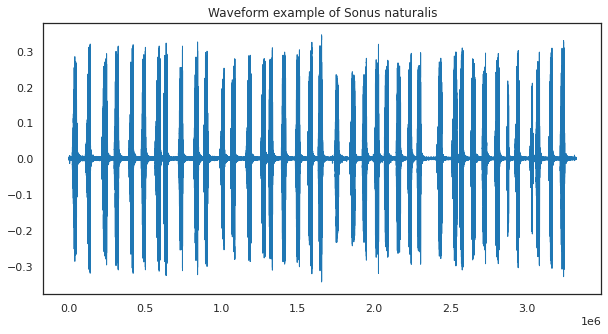

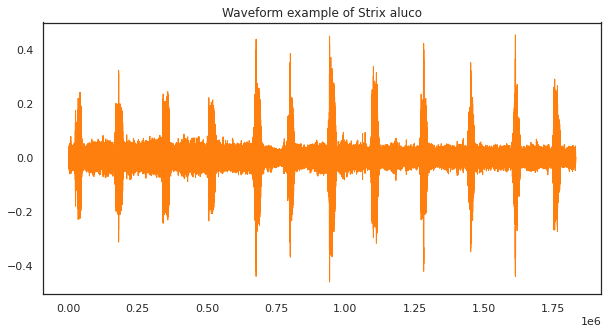

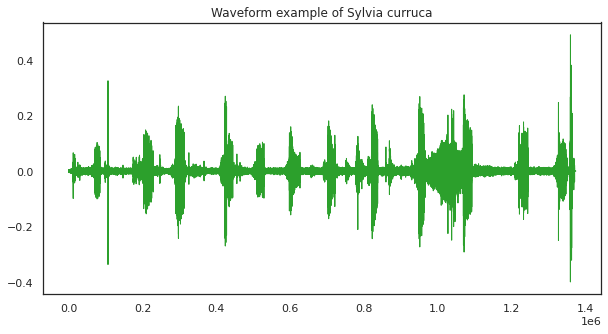

In [ ]:
# plot some waveform examples from the dataset

label_1 = df.iloc[0]['Species']
label_2 = df.iloc[500]['Species']
label_3 = df.iloc[1500]['Species']

# Waveform 1
pd.Series(y_1).plot(figsize=(10, 5),
                  lw=1,
                  title=f'Waveform example of {label_1}',
                 color=color_pal[0])

plt.show()

# Waveform 2
ax_2 = pd.Series(y_2).plot(figsize=(10, 5),
                  lw=1,
                  title=f'Waveform example of {label_2}',
                 color=color_pal[1])
plt.show()

# Waveform 3
ax_3 = pd.Series(y_3).plot(figsize=(10, 5),
                  lw=1,
                  title=f'Waveform example of {label_3}',
                 color=color_pal[2])
plt.show()

In [ ]:
# Short Fourier transform and transform to dB

D_1 = librosa.stft(y_1)
S_db_1 = librosa.amplitude_to_db(np.abs(D_1), ref=np.max)
print(f'Spectrogram shape {label_1} example: {S_db_1.shape}')

D_2 = librosa.stft(y_2)
S_db_2 = librosa.amplitude_to_db(np.abs(D_2), ref=np.max)
print(f'Spectrogram shape {label_2} example: {S_db_2.shape}')

D_3 = librosa.stft(y_3)
S_db_3 = librosa.amplitude_to_db(np.abs(D_3), ref=np.max)
print(f'Spectrogram shape {label_3} example: {S_db_3.shape}')



   

Spectrogram shape Sonus naturalis example: (1025, 6491)
Spectrogram shape Strix aluco example: (1025, 3580)
Spectrogram shape Sylvia curruca example: (1025, 2685)


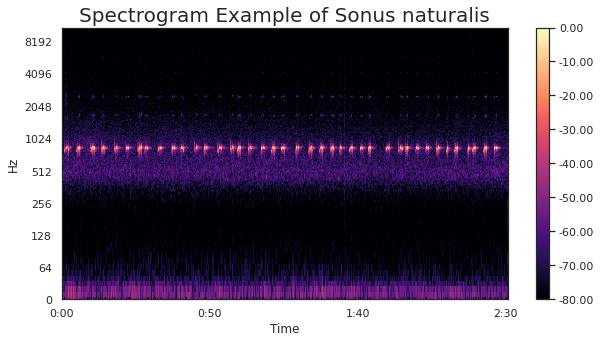

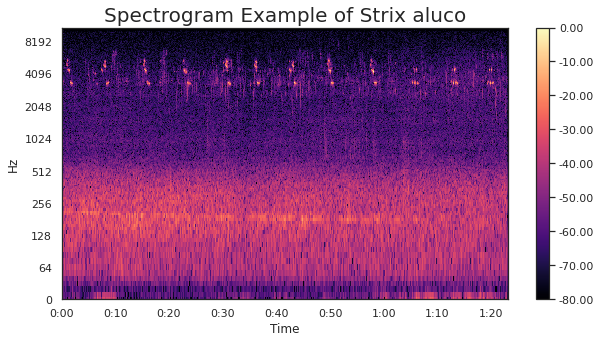

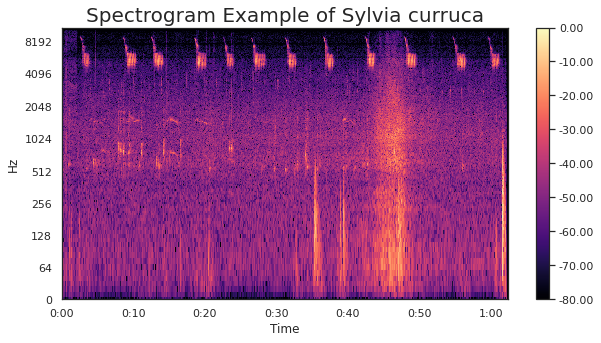

In [ ]:
# Plot Spectrograms

fig, ax = plt.subplots(figsize=(10, 5))
img_1 = librosa.display.specshow(S_db_1,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title(f'Spectrogram Example of {label_1}', fontsize=20)
fig.colorbar(img_1, ax=ax, format=f'%0.2f')
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
img_2 = librosa.display.specshow(S_db_2,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title(f'Spectrogram Example of {label_2}', fontsize=20)
fig.colorbar(img_2, ax=ax, format=f'%0.2f')
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
img_3 = librosa.display.specshow(S_db_3,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title(f'Spectrogram Example of {label_3}', fontsize=20)
fig.colorbar(img_3, ax=ax, format=f'%0.2f')
plt.show()

In [ ]:
# Generate mel spectrograms and transform to dB

S_1 = librosa.feature.melspectrogram(y=y_1,
                                   sr=sr,
                                   n_mels=128, 
                                   hop_length=251,
                                   n_fft = 128 * 20)
S_db_mel_1 = librosa.amplitude_to_db(S_1, ref=np.max)

S_2 = librosa.feature.melspectrogram(y=y_2,
                                   sr=sr,
                                   n_mels=128,
                                   hop_length=251,
                                   n_fft = 128 * 20)
S_db_mel_2 = librosa.amplitude_to_db(S_2, ref=np.max)

S_3 = librosa.feature.melspectrogram(y=y_3,
                                   sr=sr,
                                   n_mels=128, 
                                   hop_length=251,
                                   n_fft = 128 * 20)
S_db_mel_3 = librosa.amplitude_to_db(S_3, ref=np.max)

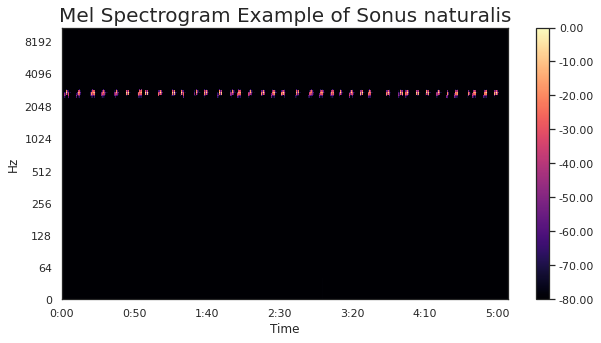

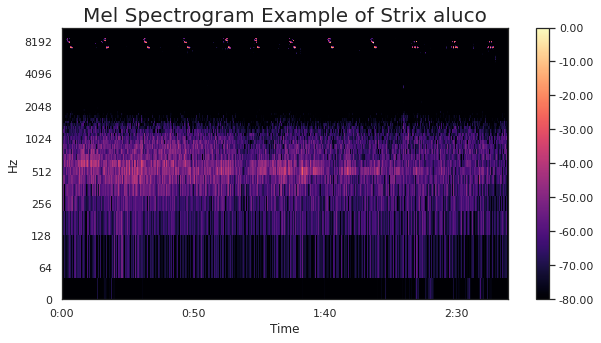

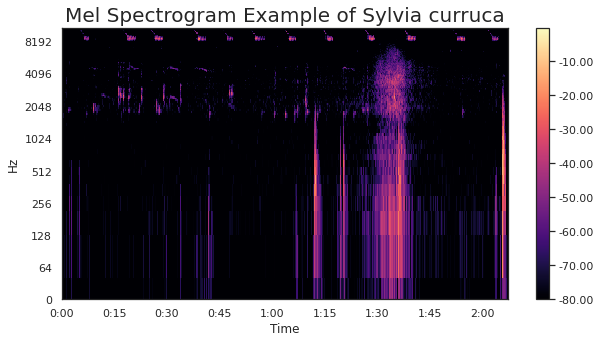

In [ ]:
# Plot mel spectrograms

fig, ax = plt.subplots(figsize=(10, 5))

# log-mel spectrogram 1
img_1 = librosa.display.specshow(S_db_mel_1,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title(f'Mel Spectrogram Example of {label_1}', fontsize=20)
fig.colorbar(img_1, ax=ax, format=f'%0.2f')
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))

# log-mel spectrogram 2
img_2 = librosa.display.specshow(S_db_mel_2,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title(f'Mel Spectrogram Example of {label_2}', fontsize=20)
fig.colorbar(img_2, ax=ax, format=f'%0.2f')
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))

# log-mel spectrogram 3
img_3 = librosa.display.specshow(S_db_mel_3,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title(f'Mel Spectrogram Example of {label_3}', fontsize=20)
fig.colorbar(img_3, ax=ax, format=f'%0.2f')
plt.show()